## Netflix Movie recommendation system

Importing all required libraries:<br>
    Pandas for dealing with Datasets<br>
    Matplotlib for visualisation<br>
    Word Cloud for visualising the genres or movies in the form of a cloud<br>
    Tfidf Vectorizer for converting text to usable vector<br>
    linear kernel for pairwise comparision<br>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pickle
import os

Importing Datasets that contains movie names and its ratings.

In [58]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

A glance at movies dataset

movieId - Unique Id's of Movies<br>
title - Movie Titles<br>
genres - Genre of the Movie.

In [59]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


A glance at ratings dataset

userId - User's Unique ID <br>
movieId - User rated Movie<br>
rating - Rating given by the User<br>
timestamp - Time of Rating

In [60]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


Information of Movies Dataset

In [61]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


Information of Ratings Dataset.

In [62]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [63]:
genres=[]
for genre in movies.genres:   
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)   

Combining Two Datasets into one

In [64]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()
df.to_csv('final_data.csv')

Grouping Dataset on Title and Rating

In [65]:
df1=df.groupby(['title'])[['rating']].sum()
df1.head()

,rating
title,
'71 (2014),3.5
'Hellboy': The Seeds of Creation (2004),3.0
'Round Midnight (1986),2.5
'Til There Was You (1997),12.0
"'burbs, The (1989)",62.5


Top 20 movies with highest Rating.

In [66]:
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


Bar graph of 20 Movies with highest recommendation

<BarContainer object of 20 artists>

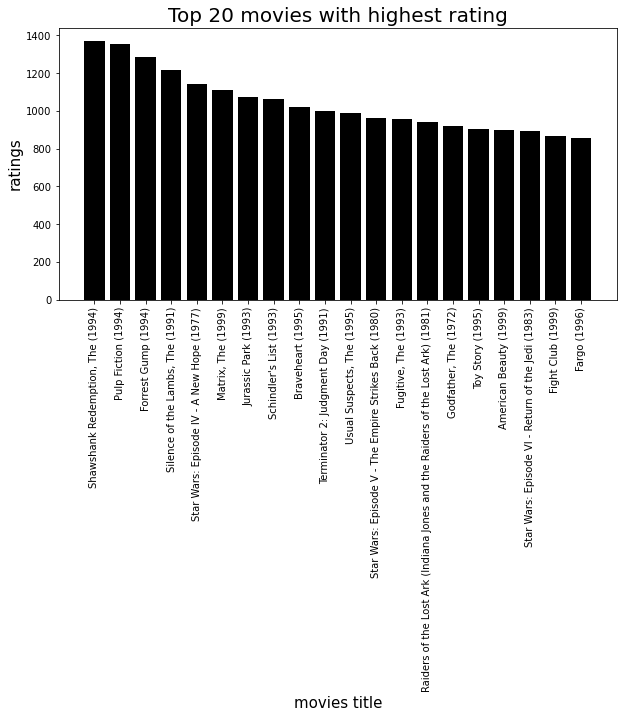

In [67]:
plt.figure(figsize=(10,5))
plt.title('Top 20 movies with highest rating',fontsize=20)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=15)
plt.xticks(fontsize=10,rotation=90)
plt.xlabel('movies title',fontsize=15)
plt.yticks(fontsize=10)
plt.bar(high_rated.index,high_rated['rating'],color='black')

Count of Number of people rated a movie

In [68]:
df2=df.groupby('title')[['rating']].count()
df2.head()

,rating
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),1
'Til There Was You (1997),3
"'burbs, The (1989)",20


Movies with most people rating it

In [69]:
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


Bar graph of 20 Movies with most peoplr rating

<BarContainer object of 20 artists>

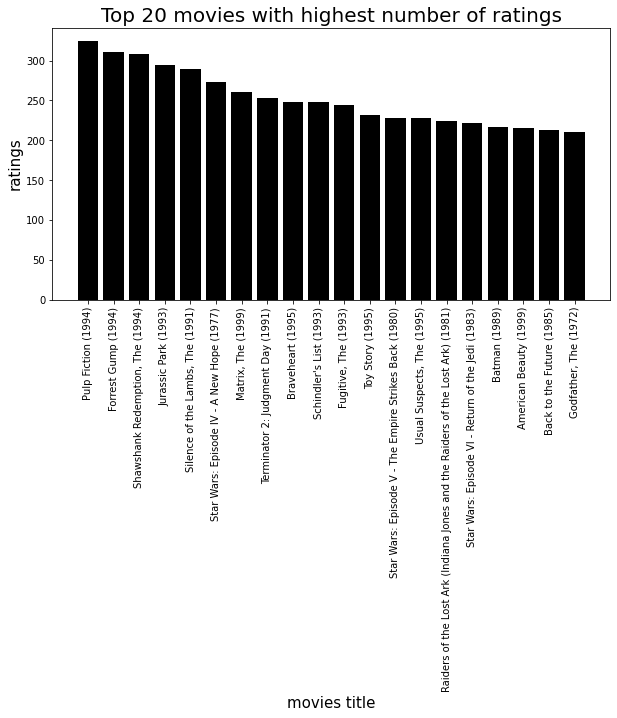

In [70]:
plt.figure(figsize=(10,5))
plt.title('Top 20 movies with highest number of ratings',fontsize=20)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('movies title',fontsize=15)
plt.ylabel('ratings',fontsize=15)

plt.bar(rating_count_20.index,rating_count_20.rating,color='black')

Using Tfidf Vectorizer over genres of the Movies

In [73]:
cv=TfidfVectorizer()
transformer=cv.fit(movies['genres'])
print(transformer)
#tfidf_matrix=cv.fit_transform(movies['genres'])


TfidfVectorizer()


In [72]:
vectorizer_path = open('vectorizer.pkl', 'wb')
pickle.dump(transformer, vectorizer_path)


In [36]:
tfidf_matrix=cv.fit_transform(movies['genres'])
movie_user = df.pivot_table(index='userId',columns='title',values='rating')

Here we use Cosine Similarity between movies and recommend.

In [23]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']

In [20]:
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

Lets try to recommend movies to person who watched Turbo.

In [21]:
recommendations('Turbo (2013)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

Lets try to recommend movies to person who watched Turbo.

In [107]:
recommendations('Jumanji (1995)')

55                     Indian in the Cupboard, The (1995)
112                     NeverEnding Story III, The (1994)
817                       Escape to Witch Mountain (1975)
1604            Darby O'Gill and the Little People (1959)
1652                                  Return to Oz (1985)
1716                        NeverEnding Story, The (1984)
1717    NeverEnding Story II: The Next Chapter, The (1...
1908                        Santa Claus: The Movie (1985)
3817    Harry Potter and the Sorcerer's Stone (a.k.a. ...
6471                            Magic in the Water (1995)
6846    Chronicles of Narnia: The Lion, the Witch and ...
7254                          Bridge to Terabithia (2007)
7563                           Golden Compass, The (2007)
7594          Water Horse: Legend of the Deep, The (2007)
7727     Chronicles of Narnia: Prince Caspian, The (2008)
8715                           Alice in Wonderland (1933)
8795    Chronicles of Narnia: The Voyage of the Dawn T...
9747          